# First Name: Anh Duc
# Last Name: Dang


# Total time compelexity: O(nlogn)

# Import Libraries

In [1]:
# import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
# import library for visualizing data 
import matplotlib.pyplot as plt

In [2]:
#read in csv file into 
cities = pd.read_csv('../input/cities.csv')

#avoid run time errors - bug fix for display formats
pd.set_option('display.float_format', lambda x:'%f'%x)
cities = cities.apply(pd.to_numeric, errors='coerce')

# Prime Cities

In [3]:
#function to find which are prime cities
def find_primes(n):
    primes = [True for i in range(n+1)] # Start assuming all numbers are primes
    primes[0] = False # 0 is not a prime
    primes[1] = False # 1 is not a prime
    for i in range(2,int(np.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)

In [4]:
cities['is_prime'] = find_primes(max(cities.CityId))

In [5]:
prime_cities = find_primes(max(cities.CityId))


In [6]:
cities.head()

,CityId,X,Y,is_prime
0,0,316.836739,2202.340707,False
1,1,4377.405972,336.602082,False
2,2,3454.158198,2820.053011,True
3,3,4688.099298,2935.898056,True
4,4,1010.696952,3236.750989,False


# Visualization of citites

<IPython.core.display.Javascript object>


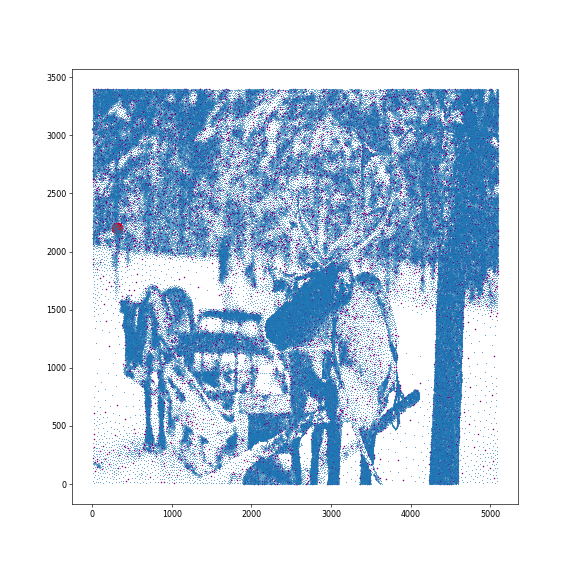

In [7]:
%matplotlib notebook
fig = plt.figure(figsize=(10,10))
plt.scatter(cities[cities['CityId']==0].X , cities[cities['CityId']==0].Y, s= 200, color = 'red')
plt.scatter(cities[cities['is_prime']==True].X , cities[cities['is_prime']==True].Y, s= 0.8, color = 'purple')
plt.scatter(cities[cities['is_prime']==False].X , cities[cities['is_prime']==False].Y, s= 0.1)
plt.grid(False)


# Distance between two cities

In [8]:
#function to calculate distance between two cities by using euclidean distance
def pair_distance(x,y):
    x1 = (cities.X[x] - cities.X[y]) ** 2
    x2 = (cities.Y[x] - cities.Y[y]) ** 2
    return np.sqrt(x1 + x2)

# Calculate total distance

In [9]:
def total_distance(path):
    distance = [pair_distance(path[x], path[x+1]) + 0.1 * pair_distance(path[x], path[x+1])
    if (x+1)%10 == 0 and cities.is_prime[path[x]] == False else pair_distance(path[x], path[x+1]) for x in range(len(path)-1)]
    return np.sum(distance)

# Dumbest Path

In [10]:
dumbest_path = cities['CityId'].values
#add North Pole add the end of trip
dumbest_path =  np.append(dumbest_path,0)

In [11]:
print('Total distance with the sorted city path is '+ "{:,}".format(total_distance(dumbest_path)))

Total distance with the sorted city path is 446,884,407.52120817


# Quick Sort

QuickSort is a Divide and Conquer algorithm. It picks an element as pivot and partitions the given array around the picked pivot.
The time taken by QuickSort depends upon the input array and partition strategy.

**Worst Case:** The worst case occurs when the partition process always picks greatest or smallest element as pivot. If we consider above partition strategy where last element is always picked as pivot, the worst case would occur when the array is already sorted in increasing or decreasing order. Following is recurrence for worst case.

**Best Case:** The best case occurs when the partition process always picks the middle element as pivot. Following is recurrence for best case.

For this dataset, when applied quicksort I have the best case with time complexity is O(nLogn)

In [12]:
import sys
sys.setrecursionlimit(500000)


In [13]:
City_X=[]
for x in range(max(cities.CityId)+1):
    City_X.append(cities['X'][x])
City_Y=[]
for x in range(max(cities.CityId)+1):
    City_Y.append(cities['Y'][x])

In [14]:
path=[]
for x in range(1,max(cities.CityId)+1):
        path.append(x)

In [15]:
# This function takes last element as pivot, places 
# the pivot element at its correct position in sorted 
# array, and places all smaller (smaller than pivot) 
# to left of pivot and all greater elements to right 
# of pivot 
def partition(arr,low,high): 
    i = ( low-1 )         # index of smaller element 
    pivot = arr[high]     # pivot 
  
    for j in range(low , high): 
  
        # If current element is smaller than or 
        # equal to pivot 
        if   City_X[arr[j]] <= City_X[pivot]: 
          
            # increment index of smaller element 
            i = i+1 
            arr[i],arr[j] = arr[j],arr[i] 
  
    arr[i+1],arr[high] = arr[high],arr[i+1] 
    return ( i+1 ) 

In [16]:
# The main function that implements QuickSort 
# arr[] --> Array to be sorted, 
# low  --> Starting index, 
# high  --> Ending index 
  
# Function to do Quick sort 
def quickSort(arr,low,high): 
    if low < high: 
  
        # pi is partitioning index, arr[p] is now 
        # at right place 
        pi = partition(arr,low,high) 
  
        # Separately sort elements before 
        # partition and after partition 
        quickSort(arr, low, pi-1) 
        quickSort(arr, pi+1, high) 

In [17]:
quicksort_path=[]
for x in range(1,max(cities.CityId)+1):
        quicksort_path.append(x)


In [18]:
quickSort(quicksort_path,0,len(quicksort_path)-1)

In [19]:
#create a path for calculating total distance
quicksorted_path=[0]
for each in range(len(quicksort_path)):
    quicksorted_path.append(quicksort_path[each])
quicksorted_path.append(0)

In [20]:
print('Total distance with the insertion Sorted city based on X path is '+ "{:,}".format(total_distance(quicksorted_path)))

Total distance with the insertion Sorted city based on X path is 196,478,902.70736083


# Merge Sort


Like QuickSort, Merge Sort is a Divide and Conquer algorithm. It divides input array in two halves, calls itself for the two halves and then merges the two sorted halves.

Time complexity of Merge Sort is O(nLogn)

In [21]:
def mergeSort(arr): 
    if len(arr) >1: 
        mid = len(arr)//2 #Finding the mid of the array 
        L = arr[:mid] # Dividing the array elements  
        R = arr[mid:] # into 2 halves 
  
        mergeSort(L) # Sorting the first half 
        mergeSort(R) # Sorting the second half 
  
        i = j = k = 0
          
        # Copy data to temp arrays L[] and R[] 
        while i < len(L) and j < len(R): 
            if City_Y[L[i]] < City_Y[R[j]]: 
                arr[k] = L[i] 
                i+=1
            else: 
                arr[k] = R[j] 
                j+=1
            k+=1
          
        # Checking if any element was left 
        while i < len(L): 
            arr[k] = L[i] 
            i+=1
            k+=1
          
        while j < len(R): 
            arr[k] = R[j] 
            j+=1
            k+=1

In [22]:
mergesort_path=[]
for x in range(1,max(cities.CityId)+1):
        mergesort_path.append(x)

In [23]:
mergeSort(mergesort_path)

In [24]:
#create a path for calculating total distance
mergesorted_path=[0]
for each in range(len(mergesort_path)):
    mergesorted_path.append(mergesort_path[each])
mergesorted_path.append(0)

In [25]:
print('Total distance with the Merge Sorted city based on Y path is '+ "{:,}".format(total_distance(mergesorted_path)))

Total distance with the Merge Sorted city based on Y path is 322,454,844.8082249


# AVL Search Tree

AVL tree is a self-balancing Binary Search Tree (BST) where the difference between heights of left and right subtrees cannot be more than one for all nodes.

Most of the BST operations (e.g., search, max, min, insert, delete.. etc) take O(h) time where h is the height of the BST. The cost of these operations may become O(n) for a skewed Binary tree. If we make sure that height of the tree remains O(Logn) after every insertion and deletion, then we can guarantee an upper bound of O(Logn) for all these operations.

With binary search tree, the node will be arrange based on the X value and it can remove all the drawback of the tree algorithm I used in Assignment 1.

In [26]:
class TreeNode(object):
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        self.height = 1

# AVL tree class which supports the
# Insert operation
class AVL_Tree(object):
    # Recursive function to insert key in
    # subtree rooted with node and returns
    # new root of subtree.
    def insert(self, root, key):

        # Step 1 - Perform normal BST
        if not root:
            return TreeNode(key)
        elif City_X[key] < City_X[root.val]:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)

            # Step 2 - Update the height of the
        # ancestor node
        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))

        # Step 3 - Get the balance factor
        balance = self.getBalance(root)

        # Step 4 - If the node is unbalanced,
        # then try out the 4 cases
        # Case 1 - Left Left
        if balance > 1 and City_X[key] < City_X[root.left.val]:
            return self.rightRotate(root)

            # Case 2 - Right Right
        if balance < -1 and City_X[key] > City_X[root.right.val]:
            return self.leftRotate(root)

            # Case 3 - Left Right
        if balance > 1 and City_X[key] > City_X[root.left.val]:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)

            # Case 4 - Right Left
        if balance < -1 and City_X[key] < City_X[root.right.val]:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)

        return root

    def leftRotate(self, z):

        y = z.right
        T2 = y.left

        # Perform rotation
        y.left = z
        z.right = T2

        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))

        # Return the new root
        return y

    def rightRotate(self, z):

        y = z.left
        T3 = y.right

        # Perform rotation
        y.right = z
        z.left = T3

        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))

        # Return the new root
        return y

    def getHeight(self, root):
        if not root:
            return 0

        return root.height

    def getBalance(self, root):
        if not root:
            return 0

        return self.getHeight(root.left) - self.getHeight(root.right)

    def preOrder(self, root):

        if not root:
            return
        
        tree_path.append(root.val)
        self.preOrder(root.left)
        self.preOrder(root.right)
    def postOrder(self, root):

        if not root:
            return
        
        self.postOrder(root.left)
        self.postOrder(root.right)
        tree_path.append(root.val)

In [27]:
tree_path=[0]
myTree = AVL_Tree()
root = None
for each in path:
    root = myTree.insert(root, each)
myTree.postOrder(root)
tree_path.append(0)


In [28]:
print('Total distance with the Nearest Neighbor path '+  "is {:,}".format(total_distance(tree_path)))

Total distance with the Nearest Neighbor path is 196,423,945.4413318


# Dynamic Programming using Graph

Image that we can connect all cities to 1 graph and we have distance from each city to each others. We can build a adjacency matrix graph and then we applied hamiltonian cycle algorithm which will create a path that travelling to every nodes of the graph with the shortest distance.

In [29]:
from scipy.spatial import distance
matrix=[]
def generate_graph():
    for i in range(20):
        #get array of list X,Y value from dataset
        coordinates = np.array([cities.X.values, cities.Y.values]).T[0:20]
        #calculate distance of all city from last city in path list
        dist = ((coordinates - np.array([City_X[i], City_Y[i]]))**2).sum(-1)
        matrix.append(dist.tolist())
generate_graph()

In [30]:
def size(int_type):
   length = 0
   count = 0
   while (int_type):
       count += (int_type & 1)
       length += 1
       int_type >>= 1
   return count

def length(int_type):
   length = 0
   count = 0
   while (int_type):
       count += (int_type & 1)
       length += 1
       int_type >>= 1
   return length


In [31]:
def generateSubsets(n):
    l = []
    for i in range(2**n):
        l.append(i)
    return sorted(l, key = lambda x : size(x) )

In [32]:
def inSubset(i, s):
    while i > 0 and s > 0:
        s = s >> 1
        i -= 1
    cond = s & 1
    return cond

def remove(i, s):
    x = 1
    x = x << i
    l = length(s)
    l = 2 ** l - 1
    x = x ^ l
    #print ( "i - %d x - %d  s - %d x&s -  %d " % (i, x, s, x & s) )
    return x & s
def findPath(p):
    n = len(p[0])
    number = 2 ** n - 2
    prev = p[number][0]
    path = []
    while prev != -1:
        path.append(prev)
        number = remove(prev, number)
        prev = p[number][prev]
    reversepath = [str(path[len(path)-i-1]+1) for i in range(len(path))]
    reversepath.append("1")
    reversepath.insert(0, "1")
    return reversepath

In [33]:
from math import isinf
def tsp():
    n=len(matrix) 
    l = generateSubsets(n)
    cost = [ [-1 for city in range(n)] for subset in l]
    p = [ [-1 for city in range(n)] for subset in l]
    count = 1
    total = len(l)
    
    for subset in l:
        for dest in range(n):
            if not size(subset):
                cost[subset][dest] = matrix[0][dest]
            elif (not inSubset(0, subset)) and (not inSubset(dest, subset)):
                mini = float("inf")
                for i in range(n):
                    if inSubset(i, subset):
                        modifiedSubset = remove(i, subset)
                        val = matrix[i][dest] + cost[modifiedSubset][i]
                        
                        if val < mini:
                            mini = val
                            p[subset][dest] = i
                            
                if not isinf(mini):
                    cost[subset][dest] = mini
        count += 1
    path = findPath(p)
    print(" => ".join(path))
    Cost = cost[2**n-2][0]
    print("Total distance with dynamic programing using graph:",Cost)
tsp()    

1 => 7 => 5 => 9 => 19 => 13 => 3 => 18 => 4 => 17 => 10 => 16 => 2 => 8 => 20 => 6 => 12 => 14 => 15 => 11 => 1
Total distance with dynamic programing using graph: 14581454.82633774


# Submission


In [34]:
def submission():
    dict = {'Path': tree_path}  
    df = pd.DataFrame(dict) 
    #write data from dataframe to csv file
    df.to_csv('Final_Submission.csv', index=False)

In [35]:
submission()